<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice3.png' width=300/></center>

# 소매점 판매 현황

<img src='https://raw.githubusercontent.com/Jangrae/img/master/retail.png' width="650" align="left">

## 1.환경 설정

- 데이터 탐색과 전처리를 하기 전 라이브러리와 파일을 읽어옵니다.
- 시각화에 한글이 포함된 경우 이에 대한 설정을 진행합니다.

**1) 한글 설정**

- Jupyter Notebook 시각화에 한글이 표시되게 설정합니다.

In [2]:
# 라이브러리 불러오기
import matplotlib 
import matplotlib.pyplot as plt

# 폰트설정
# matplotlib.font_manager._rebuild()
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

**2) 라이브러리 불러오기**

- 사용할 라이브러리를 불러옵니다.

In [311]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

**3) 데이터 읽어오기**

- 다음 경로의 파일을 읽어와 customers, products, orders 데이터프레임을 만듭니다.
- 파일 경로1: 'https://raw.githubusercontent.com/Jangrae/csv/master/customers.csv'    
- 파일 경로2: 'https://raw.githubusercontent.com/Jangrae/csv/master/products.csv'
- 파일 경로3: 'https://raw.githubusercontent.com/Jangrae/csv/master/orders.csv'
- 단축 경로1: 'https://bit.ly/CustomersFile'    
- 단축 경로2: 'https://bit.ly/ProductsFile'  
- 단축 경로3: 'https://bit.ly/OrdersFile'  

Customer  

-CustomerID = 고객ID  

-RegisterDate = 가입날짜  

-Address = 주소  

-Gender = 성별
  
  -BirthYear = 생년
  
  -Addr1 = 시도
  
  -Addr2 = 구군

Orders  
OrderID = 한 번에 n가지 주문  
Seq = 주문순서  
Amt = 가격  
Qty = 주문 개수


In [312]:

path1 = 'https://bit.ly/CustomersFile'
path2 = 'https://bit.ly/ProductsFile'
path3 = 'https://bit.ly/OrdersFile'

cus = pd.read_csv(path1)
pro = pd.read_csv(path2)
order = pd.read_csv(path3)

In [313]:

print(cus)
print('='*10)
print(pro)
print('='*10)
print(order)


     CustomerID RegisterDate               Address Gender  BirthYear  Addr1  \
0       c017487   2002-07-31  경기 성남시 중원구 둔촌대로190번길      F       1968    경기도   
1       c017503   2002-07-31         서울 마포구 새터산12길      F       1971  서울특별시   
2       c017517   2002-07-31      경기도 남양주시 와부읍 덕소로      M       1967    경기도   
3       c017522   2002-07-31           강원도 원주시 단구로      F       1965    강원도   
4       c017526   2002-07-31  경기도 부천시 오정구 소사로730번길      F       1960    경기도   
...         ...          ...                   ...    ...        ...    ...   
2238    c400937   2017-03-12        인천광역시 계양구 주부토로      F       1980  인천광역시   
2239    c401555   2017-03-20  경기도 남양주시 별내면 청학로68번길      F       1981    경기도   
2240    c401584   2017-03-20       경기도 성남시 분당구 불정로      F       1979    경기도   
2241    c402010   2017-03-25  경기도 성남시 분당구 판교원로82번길      F       1969    경기도   
2242    c402634   2017-03-30       경기도 용인시 수지구 죽전로      F       1960    경기도   

     Addr2  
0      성남시  
1      마포구  
2     남양주시  

## 2.데이터 탐색

다음과 같은 정보 확인을 통해 처리할 대상 데이터를 이해합니다.
- 상/하위 데이터 확인
- 데이터프레임 크기 확인
- 열 이름, 데이터 형식, 값 개수 등 확인
- 기초 통계정보 확인
- 결측치 확인
- 범주형 데이터 확인
- 개별 열 값 상세 확인 등

**1) 고객 정보(customers) 4개 이상**

- customers 데이터프레임을 충분히 탐색합니다.
- 간단한 집계를 수행해 보는 것도 좋은 방법입니다.

In [314]:
# 상, 하위 데이터 확인

print(cus.head(10))
print('='*100)
print(cus.tail(10))



  CustomerID RegisterDate               Address Gender  BirthYear  Addr1 Addr2
0    c017487   2002-07-31  경기 성남시 중원구 둔촌대로190번길      F       1968    경기도   성남시
1    c017503   2002-07-31         서울 마포구 새터산12길      F       1971  서울특별시   마포구
2    c017517   2002-07-31      경기도 남양주시 와부읍 덕소로      M       1967    경기도  남양주시
3    c017522   2002-07-31           강원도 원주시 단구로      F       1965    강원도   원주시
4    c017526   2002-07-31  경기도 부천시 오정구 소사로730번길      F       1960    경기도   부천시
5    c017531   2002-07-31      인천광역시 서구 완정로64번길      F       1970  인천광역시    서구
6    c017538   2002-07-31           경기도 과천시 관문로      F       1964    경기도   과천시
7    c017544   2002-07-31      경기도 고양시 일산동구 고풍로      M       1965    경기도   고양시
8    c017546   2002-07-31       경기도 부천시 원미구 중동로      F       1966    경기도   부천시
9    c017551   2002-07-31          경기도 안성시 현수2길      F       1962    경기도   안성시
     CustomerID RegisterDate               Address Gender  BirthYear  Addr1  \
2233    c400312   2017-03-03             인천 동구 송미로  

In [315]:
# 필요 없는 열 삭제

cus.drop(['RegisterDate','Address'], axis=1,inplace=True)
print(cus.head(10))
print(cus.tail(10))

  CustomerID Gender  BirthYear  Addr1 Addr2
0    c017487      F       1968    경기도   성남시
1    c017503      F       1971  서울특별시   마포구
2    c017517      M       1967    경기도  남양주시
3    c017522      F       1965    강원도   원주시
4    c017526      F       1960    경기도   부천시
5    c017531      F       1970  인천광역시    서구
6    c017538      F       1964    경기도   과천시
7    c017544      M       1965    경기도   고양시
8    c017546      F       1966    경기도   부천시
9    c017551      F       1962    경기도   안성시
     CustomerID Gender  BirthYear  Addr1 Addr2
2233    c400312      F       1975  인천광역시    동구
2234    c400470      F       1979    경기도   용인시
2235    c400665      F       1964  인천광역시   계양구
2236    c400706      F       1981  서울특별시   마포구
2237    c400735      F       1970    경기도  남양주시
2238    c400937      F       1980  인천광역시   계양구
2239    c401555      F       1981    경기도  남양주시
2240    c401584      F       1979    경기도   성남시
2241    c402010      F       1969    경기도   성남시
2242    c402634      F       1960    경기도   용인시

In [316]:
# 데이터프레임 크기 확인
print(cus.shape)
print('='*50)
# 열 이름, 데이터 형식, 값 개수 등
print(cus.info())

(2243, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  2243 non-null   object
 1   Gender      2243 non-null   object
 2   BirthYear   2243 non-null   int64 
 3   Addr1       2243 non-null   object
 4   Addr2       2243 non-null   object
dtypes: int64(1), object(4)
memory usage: 87.7+ KB
None


In [317]:
# 기초 정보 통계 확인
print(cus.describe())
print('='*50)
# 결측치 확인
print(cus.isna().sum())

         BirthYear
count  2243.000000
mean   1971.107445
std       9.658465
min    1932.000000
25%    1966.000000
50%    1972.000000
75%    1978.000000
max    1999.000000
CustomerID    0
Gender        0
BirthYear     0
Addr1         0
Addr2         0
dtype: int64


In [318]:

# 범주형 데이터
tmp = cus.groupby(['Gender'],as_index=False)['CustomerID'].count()
print(tmp)


  Gender  CustomerID
0      F        2060
1      M         183


In [319]:
# 인덱스 확인
print(cus.index)

# 열 확인
print(cus.dtypes)

# 값 확인
print(cus.values)

# 열 정보 확인
print(cus.columns)

RangeIndex(start=0, stop=2243, step=1)
CustomerID    object
Gender        object
BirthYear      int64
Addr1         object
Addr2         object
dtype: object
[['c017487' 'F' 1968 '경기도' '성남시']
 ['c017503' 'F' 1971 '서울특별시' '마포구']
 ['c017517' 'M' 1967 '경기도' '남양주시']
 ...
 ['c401584' 'F' 1979 '경기도' '성남시']
 ['c402010' 'F' 1969 '경기도' '성남시']
 ['c402634' 'F' 1960 '경기도' '용인시']]
Index(['CustomerID', 'Gender', 'BirthYear', 'Addr1', 'Addr2'], dtype='object')


**2) 상품 정보(products) 4개 이상**

- products 데이터프레임을 충분히 탐색합니다.
- 간단한 집계를 수행해 보는 것도 좋은 방법입니다.

In [320]:
print(pro.head(20))
print('='*100)
print(pro.tail(10))



   ProductID ProductName Category SubCategory  CategoryOrd
0   p1001771          마늘       채소        뿌리채소            5
1   p1002841        딸기_대       과일          과채            2
2   p1005621        숙주나물      반찬류         나물류            1
3   p1005771        두부_소      반찬류          두부            1
4   p1005891        두부_대      반찬류          두부            1
5   p1006281        소보루빵       간식           빵            3
6   p1006411        통단팥빵       간식           빵            3
7   p1011291        낱개캔디       간식         사탕류            3
8   p1012581          깻잎       채소         잎채소            5
9   p1012641          상추       채소         잎채소            5
10  p1012751           파       채소         잎채소            5
11  p1012761         쌈모음       채소         잎채소            5
12  p1012811         시금치       채소         잎채소            5
13  p1012881          부추       채소         잎채소            5
14  p1012951         애호박       채소        열매채소            5
15  p1013161       느타리버섯       채소          버섯           

In [321]:
# 필요없는 열 삭제
pro.drop(['SubCategory','CategoryOrd'],axis=1,inplace=True)
print(pro)

   ProductID ProductName Category
0   p1001771          마늘       채소
1   p1002841        딸기_대       과일
2   p1005621        숙주나물      반찬류
3   p1005771        두부_소      반찬류
4   p1005891        두부_대      반찬류
..       ...         ...      ...
57  p1246581        초코우유      유제품
58  p1255281       딸기요거트      유제품
59  p1256521       부침용두부      반찬류
60  p1284851       유기농우유      유제품
61  p1299491          당근       채소

[62 rows x 3 columns]


In [322]:
# 데이터프레임 크기 확인
print(pro.shape)
print('='*50)
# 열 이름, 데이터 형식, 값 개수 등
print(pro.info())

(62, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ProductID    62 non-null     object
 1   ProductName  62 non-null     object
 2   Category     62 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB
None


In [323]:
# 기초 정보 통계 확인
print(pro.describe())
print('='*50)
# 결측치 확인
print(pro.isna().sum())



       ProductID ProductName Category
count         62          62       62
unique        62          59        5
top     p1001771          당근       채소
freq           1           3       23
ProductID      0
ProductName    0
Category       0
dtype: int64


In [612]:
# # 범주형 데이터
tmp1 = pro.groupby(['ProductID'],as_index=False)['ProductName'].sum()
print(tmp1)


   ProductID ProductName
0   p1001771          마늘
1   p1002841        딸기_대
2   p1005621        숙주나물
3   p1005771        두부_소
4   p1005891        두부_대
..       ...         ...
57  p1246581        초코우유
58  p1255281       딸기요거트
59  p1256521       부침용두부
60  p1284851       유기농우유
61  p1299491          당근

[62 rows x 2 columns]


In [325]:
# 인덱스 확인
print(pro.index)

# 열 확인
print(pro.dtypes)

# 값 확인
print(pro.values)

# 열 정보 확인
print(pro.columns)

RangeIndex(start=0, stop=62, step=1)
ProductID      object
ProductName    object
Category       object
dtype: object
[['p1001771' '마늘' '채소']
 ['p1002841' '딸기_대' '과일']
 ['p1005621' '숙주나물' '반찬류']
 ['p1005771' '두부_소' '반찬류']
 ['p1005891' '두부_대' '반찬류']
 ['p1006281' '소보루빵' '간식']
 ['p1006411' '통단팥빵' '간식']
 ['p1011291' '낱개캔디' '간식']
 ['p1012581' '깻잎' '채소']
 ['p1012641' '상추' '채소']
 ['p1012751' '파' '채소']
 ['p1012761' '쌈모음' '채소']
 ['p1012811' '시금치' '채소']
 ['p1012881' '부추' '채소']
 ['p1012951' '애호박' '채소']
 ['p1013161' '느타리버섯' '채소']
 ['p1013251' '당근' '채소']
 ['p1026741' '유부' '반찬류']
 ['p1030071' '토마토' '과일']
 ['p1036481' '순두부' '반찬류']
 ['p1052661' '새우깡' '간식']
 ['p1054261' '고구마스틱' '간식']
 ['p1072601' '우유1000' '유제품']
 ['p1089531' '감자칩' '채소']
 ['p1097591' '팽이버섯' '채소']
 ['p1097821' '짱구' '간식']
 ['p1097831' '감자칩' '간식']
 ['p1100371' '연두부' '반찬류']
 ['p1119071' '뿌셔뿌셔' '간식']
 ['p1127201' '플레인요거트' '유제품']
 ['p1133371' '우유200' '유제품']
 ['p1139681' '감귤컵푸딩' '간식']
 ['p1139701' '포도컵푸딩' '간식']
 ['p1144371' '청오이' '채소']
 ['p1144

In [615]:

print(cus.value_counts())


CustomerID  Gender  BirthYear  Addr1  Addr2
c017487     F       1968       경기도    성남시      1
c306719     F       1969       서울특별시  은평구      1
c305895     F       1979       경기도    의왕시      1
c305921     F       1977       서울특별시  강서구      1
c306199     F       1977       경기도    고양시      1
                                              ..
c149838     F       1970       경기도    의왕시      1
c149615     F       1979       서울특별시  종로구      1
c149399     F       1973       경기도    안성시      1
c148979     F       1955       경기도    김포시      1
c402634     F       1960       경기도    용인시      1
Length: 2243, dtype: int64


**3) 주문 정보(orders) 4개 이상**

- orders 데이터프레임을 충분히 탐색합니다.
- 간단한 집계를 수행해 보는 것도 좋은 방법입니다.

In [326]:
print(order.head(10))
print('='*100)
print(order.tail(10))



   OrderID  Seq   OrderDate ProductID  Qty   Amt CustomerID
0        1    1  2016-01-02  p1030071    2  7900    c107853
1        2    1  2016-01-02  p1012761    1  1700    c110521
2        2    2  2016-01-02  p1012581    1  1000    c110521
3        2    3  2016-01-02  p1175481    1  1300    c110521
4        2    4  2016-01-02  p1178011    1  8800    c110521
5        3    1  2016-01-02  p1012751    2  2700    c143548
6        4    1  2016-01-02  p1097821    1  1000    c256672
7        4    2  2016-01-02  p1178011    1  8800    c256672
8        5    1  2016-01-02  p1178011    1  8800    c260294
9        5    2  2016-01-02  p1194801    1  8200    c260294
       OrderID  Seq   OrderDate ProductID  Qty    Amt CustomerID
68829       74    2  2017-03-31  p1175481    1   1300    c221180
68830       74    3  2017-03-31  p1201601    1   2100    c221180
68831       75    1  2017-03-31  p1097821    1   1000    c255098
68832       75    2  2017-03-31  p1119071    1   1091    c255098
68833       75 

In [327]:

# 데이터프레임 크기 확인
print(order.shape)
print('='*50)
# 열 이름, 데이터 형식, 값 개수 등
print(order.info())


(68839, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68839 entries, 0 to 68838
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   OrderID     68839 non-null  int64 
 1   Seq         68839 non-null  int64 
 2   OrderDate   68839 non-null  object
 3   ProductID   68839 non-null  object
 4   Qty         68839 non-null  int64 
 5   Amt         68839 non-null  int64 
 6   CustomerID  68839 non-null  object
dtypes: int64(4), object(3)
memory usage: 3.7+ MB
None


In [328]:


# 기초 정보 통계 확인
print(order.describe())
print('='*50)
# 결측치 확인
print(order.isna().sum())


            OrderID           Seq           Qty            Amt
count  68839.000000  68839.000000  68839.000000   68839.000000
mean      38.551519      2.082628      1.266985    2847.057990
std       23.952370      1.469644      1.372289    2634.378327
min        1.000000      1.000000      1.000000     250.000000
25%       18.000000      1.000000      1.000000    1300.000000
50%       37.000000      2.000000      1.000000    1950.000000
75%       56.000000      3.000000      1.000000    3227.000000
max      122.000000     15.000000    200.000000  109100.000000
OrderID       0
Seq           0
OrderDate     0
ProductID     0
Qty           0
Amt           0
CustomerID    0
dtype: int64


In [329]:

# 범주형 데이터
tmp2 = order.groupby(['ProductID'],as_index=False)['Qty'].count()
print(tmp2)


   ProductID   Qty
0   p1001771   977
1   p1002841   844
2   p1005621   826
3   p1005771  3378
4   p1005891  3937
..       ...   ...
57  p1246581  1054
58  p1255281   537
59  p1256521   580
60  p1284851  2017
61  p1299491   495

[62 rows x 2 columns]


In [330]:
# 인덱스 확인
print(order.index)

# 열 확인
print(order.dtypes)

# 값 확인
print(order.values)

# 열 정보 확인
print(order.columns)

RangeIndex(start=0, stop=68839, step=1)
OrderID        int64
Seq            int64
OrderDate     object
ProductID     object
Qty            int64
Amt            int64
CustomerID    object
dtype: object
[[1 1 '2016-01-02' ... 2 7900 'c107853']
 [2 1 '2016-01-02' ... 1 1700 'c110521']
 [2 2 '2016-01-02' ... 1 1000 'c110521']
 ...
 [78 1 '2017-03-31' ... 1 1900 'c354639']
 [79 1 '2017-03-31' ... 1 1950 'c394131']
 [79 2 '2017-03-31' ... 1 2200 'c394131']]
Index(['OrderID', 'Seq', 'OrderDate', 'ProductID', 'Qty', 'Amt', 'CustomerID'], dtype='object')


In [616]:


print(pro.value_counts())



ProductID  ProductName  Category
p1001771   마늘           채소          1
p1194801   딸기_소         과일          1
p1144371   청오이          채소          1
p1144661   양배출          채소          1
p1149381   팥아이스크림       유제품         1
                                   ..
p1097821   짱구           간식          1
p1097831   감자칩          간식          1
p1100371   연두부          반찬류         1
p1119071   뿌셔뿌셔         간식          1
p1299491   당근           채소          1
Length: 62, dtype: int64


## 3.데이터 전처리

전처리 과정에서 다음과 같은 처리를 할 수 있습니다.

- 결측치 처리
- 값 변경
- 열 추가
- 불필요한 열 제거
- 열 이름 변경
- 데이터 통합(연결 또는 조인)
- 가변수화 등

**1) 데이터 통합 --> sales 데이터 프레임**

- 각 데이터프레임의 모든 열을 통합 할 것이 아니면 
    - 필요한 열만 추출해 별도 데이터프레임을 선언한 후 통합하거나
    - 또는 모두 통합 후 불필요한 열을 제거하는 방법을 사용합니다.

In [331]:
# sales = pd.merge(cus,pro,how='inner',on='Gender')
# sales = pd.merge(sales,order,how='inner',on='Gender')
sales=pd.merge(cus,order, how='inner',on='CustomerID')
sales=pd.merge(sales,pro, how='inner',on='ProductID')
# sales = pd.concat([cus,pro],join='outer',axis=0)
# sales = pd.concat([sales,order],join='outer',axis=0)
# sales = pd.concat([cus,pro],join='outer',axis=1)
# sales = pd.concat([sales,order],join='outer',axis=1)
print(sales)

      CustomerID Gender  BirthYear  Addr1 Addr2  OrderID  Seq   OrderDate  \
0        c017487      F       1968    경기도   성남시       46    1  2016-01-14   
1        c017487      F       1968    경기도   성남시       37    2  2016-09-18   
2        c017517      M       1967    경기도  남양주시       31    2  2016-01-23   
3        c017517      M       1967    경기도  남양주시       19    3  2016-07-24   
4        c017517      M       1967    경기도  남양주시       78    2  2017-01-02   
...          ...    ...        ...    ...   ...      ...  ...         ...   
68834    c366986      F       1973  서울특별시   마포구       66    2  2016-05-28   
68835    c366986      F       1973  서울특별시   마포구       23    3  2016-08-08   
68836    c367093      F       1985  서울특별시  영등포구        5    4  2016-03-19   
68837    c372461      F       1986    경기도   부천시       71    2  2016-08-10   
68838    c376203      F       1978    경기도   시흥시       28    1  2016-05-25   

      ProductID  Qty   Amt ProductName Category  
0      p1013161    1  290

**2) 결과 확인**

In [332]:

print(sales.head(10))
print(sales.tail(10))


  CustomerID Gender  BirthYear Addr1 Addr2  OrderID  Seq   OrderDate  \
0    c017487      F       1968   경기도   성남시       46    1  2016-01-14   
1    c017487      F       1968   경기도   성남시       37    2  2016-09-18   
2    c017517      M       1967   경기도  남양주시       31    2  2016-01-23   
3    c017517      M       1967   경기도  남양주시       19    3  2016-07-24   
4    c017517      M       1967   경기도  남양주시       78    2  2017-01-02   
5    c017522      F       1965   강원도   원주시        9    1  2016-03-20   
6    c017522      F       1965   강원도   원주시       14    1  2016-06-03   
7    c017538      F       1964   경기도   과천시       17    1  2016-09-14   
8    c017538      F       1964   경기도   과천시       31    4  2016-11-26   
9    c017538      F       1964   경기도   과천시       44    1  2017-03-07   

  ProductID  Qty   Amt ProductName Category  
0  p1013161    1  2900       느타리버섯       채소  
1  p1013161    2  5900       느타리버섯       채소  
2  p1013161    1  2900       느타리버섯       채소  
3  p1013161    1  2950 

In [333]:
print(sales.isna().sum())


CustomerID     0
Gender         0
BirthYear      0
Addr1          0
Addr2          0
OrderID        0
Seq            0
OrderDate      0
ProductID      0
Qty            0
Amt            0
ProductName    0
Category       0
dtype: int64


**3) 열 추가**

- 분석을 위해 필요한 열을 추가합니다.
- 예를 들어 다음과 같은 열들이 필요하다고 판단할 수 있습니다.
    - OrderYear: 주문연도, 주문연도별 분석이 용이하게 하기 위함
    - OrderMonth: 주문월, 주문년월 분석이 용이하게 하기 위함
    - Age: 연령별 분석을 하기 위함(2017 - 출생년도) 등등

In [334]:

sales[['OrderYear','OrderMonth','Age']]=0
print(sales)

      CustomerID Gender  BirthYear  Addr1 Addr2  OrderID  Seq   OrderDate  \
0        c017487      F       1968    경기도   성남시       46    1  2016-01-14   
1        c017487      F       1968    경기도   성남시       37    2  2016-09-18   
2        c017517      M       1967    경기도  남양주시       31    2  2016-01-23   
3        c017517      M       1967    경기도  남양주시       19    3  2016-07-24   
4        c017517      M       1967    경기도  남양주시       78    2  2017-01-02   
...          ...    ...        ...    ...   ...      ...  ...         ...   
68834    c366986      F       1973  서울특별시   마포구       66    2  2016-05-28   
68835    c366986      F       1973  서울특별시   마포구       23    3  2016-08-08   
68836    c367093      F       1985  서울특별시  영등포구        5    4  2016-03-19   
68837    c372461      F       1986    경기도   부천시       71    2  2016-08-10   
68838    c376203      F       1978    경기도   시흥시       28    1  2016-05-25   

      ProductID  Qty   Amt ProductName Category  OrderYear  OrderMonth  Age

**4) 불필요한 열 제거**

- 분석에 필요가 없다고 생각되는 열은 제거합니다.
- 새로운 열을 추가하면 기존 열이 필요하지 않을 수 있습니다.
- 예를 들어 다음 열들이 필요하지 않다고 판단할 수 있습니다.
    - OrderDate: 새로 추가한 OrderYear, OrderMonth 열 사용
    - ProductID: ProductName 열 사용
    - SubCategory: 분석 대상에서 제외 등등

In [335]:
# 주문 년월을 각각 주문년, 주문월로 나눔
sales['OrderYear'] = sales['OrderDate'].str.split('-').str[0]
sales['OrderMonth'] = sales['OrderDate'].str.split('-').str[1]

In [336]:
# 생일 => 나이
sales['Age'] = 2017-sales['BirthYear']

In [337]:
# 필요없게된 주문년월, 생일 열 제거
sales.drop(['BirthYear','OrderDate'],axis=1,inplace=True)
print(sales)

      CustomerID Gender  Addr1 Addr2  OrderID  Seq ProductID  Qty   Amt  \
0        c017487      F    경기도   성남시       46    1  p1013161    1  2900   
1        c017487      F    경기도   성남시       37    2  p1013161    2  5900   
2        c017517      M    경기도  남양주시       31    2  p1013161    1  2900   
3        c017517      M    경기도  남양주시       19    3  p1013161    1  2950   
4        c017517      M    경기도  남양주시       78    2  p1013161    1  2950   
...          ...    ...    ...   ...      ...  ...       ...  ...   ...   
68834    c366986      F  서울특별시   마포구       66    2  p1152861    1  1091   
68835    c366986      F  서울특별시   마포구       23    3  p1152861    1  1091   
68836    c367093      F  서울특별시  영등포구        5    4  p1152861    1  1091   
68837    c372461      F    경기도   부천시       71    2  p1152861    1  1091   
68838    c376203      F    경기도   시흥시       28    1  p1152861    1  1091   

      ProductName Category OrderYear OrderMonth  Age  
0           느타리버섯       채소      2016        

In [617]:

print(order.value_counts())



OrderID  Seq  OrderDate   ProductID  Qty  Amt    CustomerID
1        1    2016-01-02  p1030071   2    7900   c107853       1
49       2    2017-02-22  p1002841   2    26200  c274126       1
              2017-01-16  p1179241   1    2050   c092647       1
              2017-01-18  p1013251   1    3200   c177887       1
              2017-01-20  p1097821   4    3636   c038272       1
                                                              ..
25       1    2016-03-13  p1005771   1    1850   c168775       1
              2016-03-14  p1052661   2    2910   c324337       1
              2016-03-15  p1178011   1    8800   c140393       1
              2016-03-16  p1194801   1    6800   c347991       1
122      1    2016-02-06  p1133371   1    1000   c366727       1
Length: 68839, dtype: int64


## 4.데이터 분석

- 현재 판매 현황을 분석해 향후 판매 전략 수립에 중요한 정보로 활용할 것입니다.
- 데이터를 집계하고 간단히 시각화하여 판매 현황을 분석합니다.
- 연속형 값은 선 그래프, 범주형 값은 막대 그래프로 시각화함이 일반적입니다.

**1) 남녀별 판매 현황**

- 남녀별 판매 현황을 막대 그래프로 시각화해 확인합니다.

In [342]:
temp = sales.groupby('Gender',as_index=False)['Amt'].sum()
print(temp)

  Gender        Amt
0      F  176604277
1      M   19384348


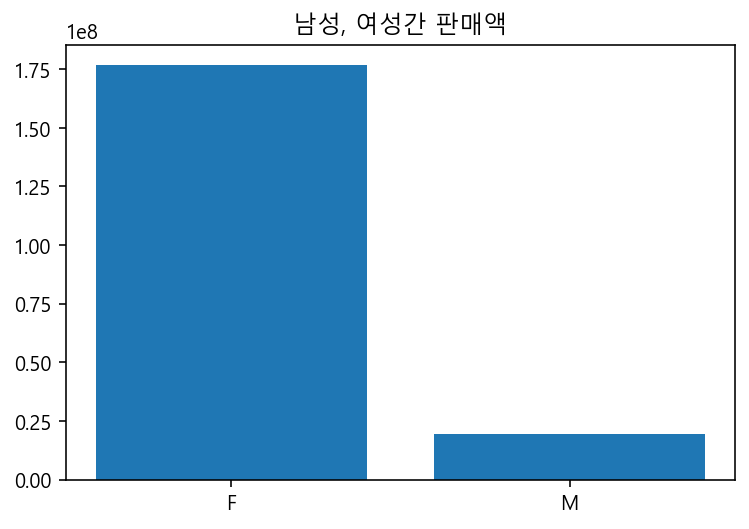

In [580]:
# 남성, 여성간 판매액
plt.title('남성, 여성간 판매액')
plt.bar(temp['Gender'],temp['Amt'])
plt.show()

# 남성 판매량 증가를 위해서 남성이 원하는 상품을 추가해야할 필요가 보임.

**2) 지역별 판매 현황**

- 지역별 판매 현황을 막대 그래프로 시각화해 확인합니다.

In [346]:
temp2 = sales.groupby('Addr1',as_index=False)['Amt'].sum()
print(temp2)

    Addr1        Amt
0     강원도    6397272
1     경기도  112347668
2    경상남도       3000
3    경상북도      60400
4   광주광역시      60914
5   대구광역시    1071667
6   서울특별시   47027183
7   인천광역시   27743748
8    전라남도     117339
9    전라북도      13941
10   충청남도     601028
11   충청북도     544465


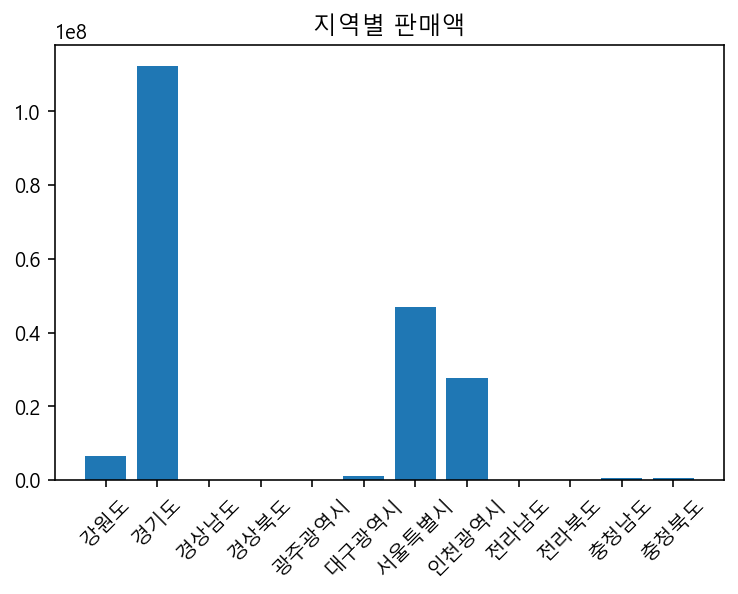

In [581]:
# 지역별 판매액
plt.title('지역별 판매액')
plt.bar(temp2['Addr1'],temp2['Amt'])
plt.xticks(rotation=45)
plt.show()

# 수도권에 몰려있는걸 확인 가능.

**3) 추가**

In [357]:
temp3 = sales.groupby('Category',as_index=False)['Amt'].sum()
print(temp3)

  Category       Amt
0       간식  13081325
1       과일  50067195
2      반찬류  32288089
3      유제품  45338311
4       채소  55213705


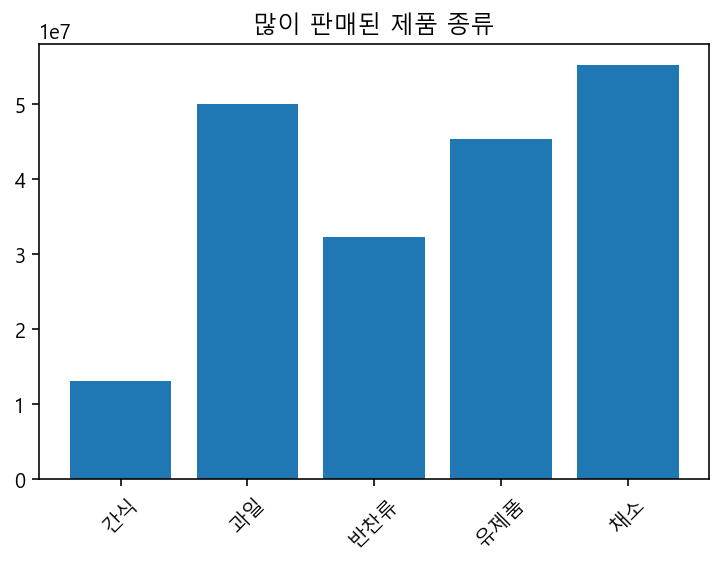

In [583]:
plt.title('많이 판매된 제품 종류')
plt.bar(temp3['Category'],temp3['Amt'])
plt.xticks(rotation=45)
plt.show()

# 채소 > 과일 > 유제품 > 반찬류 > 간식 순서로 판매가 이뤄지고 있다.

**4) 추가**

In [610]:
# 각 제품 카테고리 구매자 평균 연령
temp4 = sales.groupby('Category',as_index=False)['Age'].mean()
print(temp4)

  Category        Age
0       간식  43.513541
1       과일  45.483304
2      반찬류  47.089142
3      유제품  43.985429
4       채소  46.005546


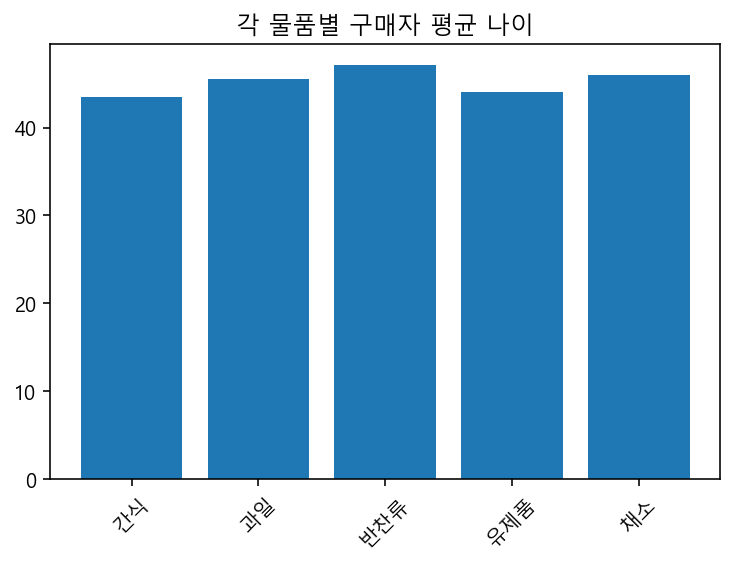

In [611]:
plt.title('각 물품별 구매자 평균 나이')
plt.bar(temp4['Category'],temp4['Age'])
plt.xticks(rotation=45)
plt.show()

# 40대가 주요 고객층인걸 확인 가능.
# 이를통해 부모님 선물 목적의 건강용품이나 자식 장난감 등을 제품에 추가한다면 효과적일 수 있다.

**5) 추가**

In [594]:
# 많이 판매된 제품
temp5 = sales.groupby('ProductName',as_index=False)['Amt'].sum()
temp5 = temp5.sort_values(by='Amt',ascending=False)

print(temp5)



   ProductName       Amt
37      우유1000  18122113
23        사과_소  14129078
9         딸기_대  11064509
7         두부_대  10108897
10        딸기_소   7562421
8         두부_소   7348918
49         콩나물   6987517
39       유기농우유   6445713
50         토마토   6369971
43          참외   5490530
22        사과_대   5450686
57      플레인요거트   5214557
52           파   4537888
6           당근   4484750
41       저지방우유   4408729
5        느타리버섯   4202899
44         청오이   3963278
1          감자칩   3707446
32         애호박   3511470
20        브로컬리   3503112
13          마늘   3367627
31         쌈모음   3227171
58          피망   3203181
3           깻잎   2908859
30         시금치   2679890
28        숙주나물   2616053
15      무농약시금치   2505802
46        초코우유   2473211
26         새우깡   2379314
38       우유200   2352348
42          짱구   2182495
40          유부   2137066
17         백오이   2053063
36          열무   1904092
2        고구마스틱   1622977
25          상추   1503694
33         양배출   1474920
14           무   1273705
21        뿌셔뿌셔   1270223


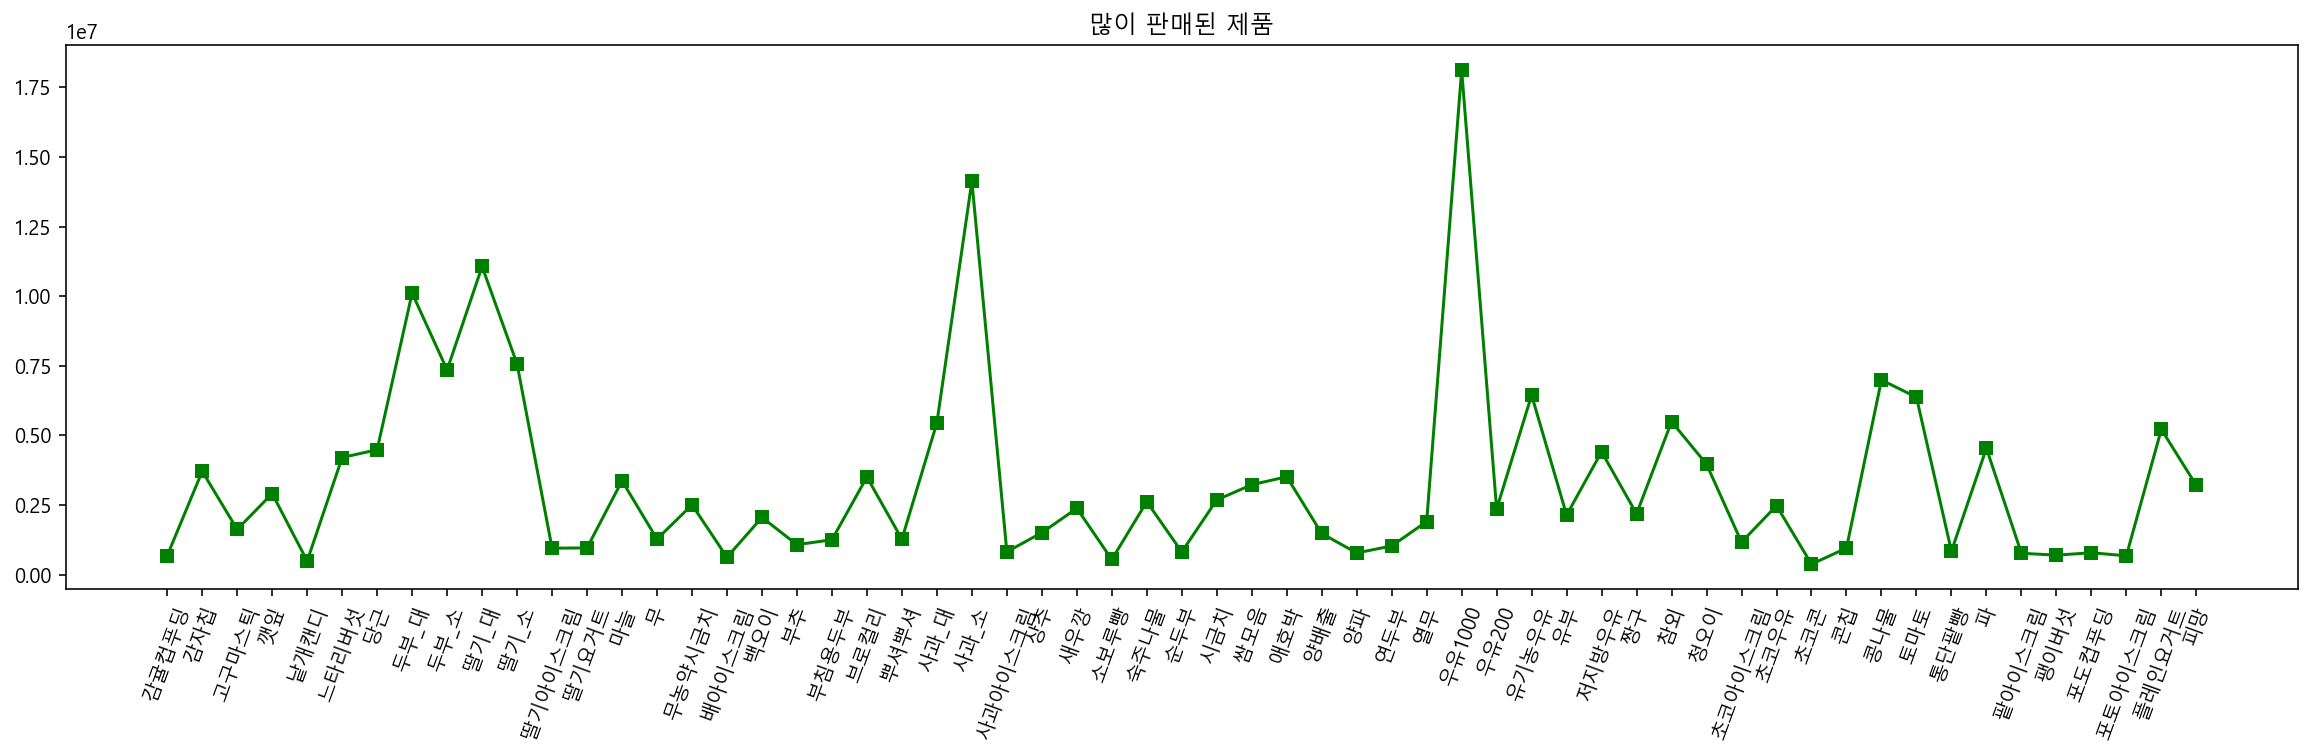

In [585]:

plt.figure(figsize=(20,5))
plt.title('많이 판매된 제품')
plt.plot(temp5['ProductName'],temp5['Amt'],marker='s',color='g')
plt.xticks(rotation=70)
plt.show()

# 우유 > 사과(소) > 두부 순서로 많이 팔린걸 알 수 있다.

## 5.고객 분류

* 고객을 등급을 나눠 판매 현황을 분석하고 이에 따른 판매 전략을 수립하려합니다.
- 우선 고객을 일정 기준에 따라 분류하고 등급을 지정해야 합니다.
- 다음과 같은 순서로 처리하면 될 것입니다.
    - 고객별 주문 수량 합, 판매 금액 합을 갖는 데이터프레임 선언
    - 고객 분류 기준과 이 기준에 따른 등급 이름 정의
    - 고객 등급을 갖는 새로운 Level 열 추가

**1) 고객별 집계**

* 고객별 주문 수량 합, 판매 금액 합을 갖는 cst 데이터프레임을 선언합니다.

In [460]:

temp6 = sales.groupby('CustomerID',as_index=False)['Seq'].count()
temp7 = sales.groupby('CustomerID',as_index=False)['Amt'].sum()
print(temp6)
print(temp7)



     CustomerID  Seq
0       c017487   90
1       c017503   37
2       c017517  124
3       c017522   61
4       c017526   21
...         ...  ...
2232    c400937    1
2233    c401555    3
2234    c401584    2
2235    c402010    3
2236    c402634    3

[2237 rows x 2 columns]
     CustomerID     Amt
0       c017487  296447
1       c017503  160444
2       c017517  317590
3       c017522  219849
4       c017526   48881
...         ...     ...
2232    c400937    1650
2233    c401555   11940
2234    c401584    6509
2235    c402010   20650
2236    c402634    4850

[2237 rows x 2 columns]


In [518]:
cst = pd.merge(temp6,temp7,on='CustomerID',how='inner')
print(cst)

     CustomerID  Seq     Amt
0       c017487   90  296447
1       c017503   37  160444
2       c017517  124  317590
3       c017522   61  219849
4       c017526   21   48881
...         ...  ...     ...
2232    c400937    1    1650
2233    c401555    3   11940
2234    c401584    2    6509
2235    c402010    3   20650
2236    c402634    3    4850

[2237 rows x 3 columns]


**2) 고객 분류 기준 찾기**

- 고객 등급 분류 기준을 찾기 위해 관련 데이터를 확인합니다.

In [519]:
tmp = cst.sort_values(by='Amt',ascending=False)
print(tmp)

     CustomerID  Seq      Amt
975     c206248  273  1245250
494     c110521  289  1111062
1172    c236759  389  1084895
331     c085186  282  1080608
120     c043687  234  1043129
...         ...  ...      ...
1459    c302101    1      600
2172    c392000    1      600
495     c110727    1      600
1693    c334275    1      273
972     c205545    1      273

[2237 rows x 3 columns]


In [520]:

print(cst.describe())


               Seq           Amt
count  2237.000000  2.237000e+03
mean     30.772910  8.761226e+04
std      46.525738  1.401784e+05
min       1.000000  2.730000e+02
25%       3.000000  8.450000e+03
50%      11.000000  3.015000e+04
75%      37.000000  1.026730e+05
max     389.000000  1.245250e+06


**3) 고객 분류 기준 정리**

- 고객 등급 분류 기준과 그 기준에 따른 등급 이름을 정리합니다.
- 예를 들면 다음과 같은 기준과 등급 이름을 정의할 수 있을 것입니다.
    - ~ 30,000: Family
    - 30,000 ~ 100,000: Bronze
    - 100,000 ~ 300,000: Silver
    - 300,000 ~ : Gold
    - 600,000 ~ : Platinum
- 분류 기준과 등급 이름
    -  25% 미만 : 비기너 클래스
    -  25% ~ 50% 미만 : 엘리멘트리 클래스
    -  50% ~ 75% 미만 : 미들 클래스
    -  75% 이상 : 하이 클래스

**4) 고객 등급 반영**

- 각자 정의한 기준에 따라 고객 등급을 Level 열로 저장합니다.

In [521]:
print(cst)

     CustomerID  Seq     Amt
0       c017487   90  296447
1       c017503   37  160444
2       c017517  124  317590
3       c017522   61  219849
4       c017526   21   48881
...         ...  ...     ...
2232    c400937    1    1650
2233    c401555    3   11940
2234    c401584    2    6509
2235    c402010    3   20650
2236    c402634    3    4850

[2237 rows x 3 columns]


In [522]:
cst['Rank'] = pd.cut(cst['Amt'],3,labels = ['r1','r2','r3'])
# 판매액에 따라 등급을 나눔.
# r1 = cst.loc[cst['Amt']<300000]
# r2 = cst.loc[(cst['Amt']>=300000)&(cst['Amt']<600000)]
# r3 = cst.loc[(cst['Amt']>=600000)&(cst['Amt']<900000)]
# r4 = cst.loc[cst['Amt']>=900000]

r1 = cst.describe().loc['25%','Amt']
r2 = cst.describe().loc['50%','Amt']
r3 = cst.describe().loc['75%','Amt']

print(cst)
# print(r1)
# print('=='*30)
# print(r2)
# print('=='*30)
# print(r3)
# print('=='*30)
# print(r4)

     CustomerID  Seq     Amt Rank
0       c017487   90  296447   r1
1       c017503   37  160444   r1
2       c017517  124  317590   r1
3       c017522   61  219849   r1
4       c017526   21   48881   r1
...         ...  ...     ...  ...
2232    c400937    1    1650   r1
2233    c401555    3   11940   r1
2234    c401584    2    6509   r1
2235    c402010    3   20650   r1
2236    c402634    3    4850   r1

[2237 rows x 4 columns]


- 등급별 고객 수를 확인해 등급이 적절히 나뉘었는지 검증합니다.
- 검증 결과가 적절하지 않다면 위 기준을 변경해 등급을 다시 나눕니다.

In [523]:
print(cst['Rank'].value_counts())

r1    2157
r2      69
r3      11
Name: Rank, dtype: int64


In [524]:

bin = [-np.inf,r1,r2,r3,np.inf]
label = ['비기너 클래스','엘리멘트리 클래스','미들 클래스','하이 클래스']
cst['Rank'] = pd.cut(cst['Amt'],bins=bin,labels=label)


print(cst)

     CustomerID  Seq     Amt       Rank
0       c017487   90  296447     하이 클래스
1       c017503   37  160444     하이 클래스
2       c017517  124  317590     하이 클래스
3       c017522   61  219849     하이 클래스
4       c017526   21   48881     미들 클래스
...         ...  ...     ...        ...
2232    c400937    1    1650    비기너 클래스
2233    c401555    3   11940  엘리멘트리 클래스
2234    c401584    2    6509    비기너 클래스
2235    c402010    3   20650  엘리멘트리 클래스
2236    c402634    3    4850    비기너 클래스

[2237 rows x 4 columns]


## 6.등급별 고객 분석

- 고객 등급을 기준으로 다양한 분석을 진행합니다.
- 등급 별 분석은 판매 전략을 새롭게 수립하는 데 중요한 자료가 될 것입니다.
- 분석 과정에서 판매 전략에 대한 부분을 고민해 보시기 바랍니다.

**1) 등급별 판매 수량**

- 고객 등급별 판매 수량을 막대 그래프로 시각화해 확인합니다.

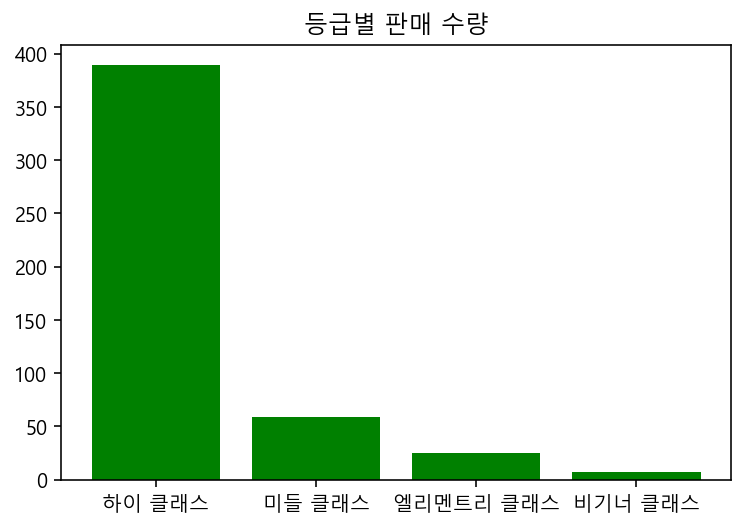

In [525]:
plt.title('등급별 판매 수량')
plt.bar(cst['Rank'],cst['Seq'],color='g')
plt.show()

# 예상대로 하이클래스의 판매 수량이 압도적으로 높음.

**2) 등급별 판매 금액**

- 고객 등급별 판매 금액을 막대 그래프로 시각화해 확인합니다. 

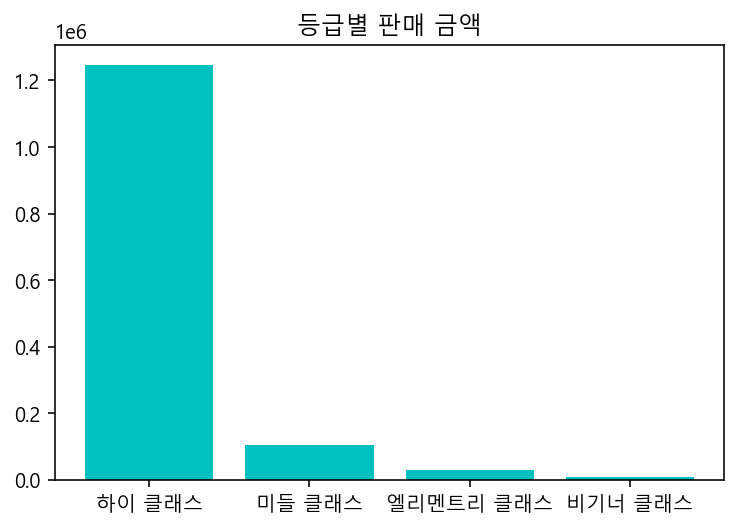

In [526]:
plt.title('등급별 판매 금액')
plt.bar(cst['Rank'],cst['Amt'], color = 'c')
plt.show()

# 위 지표와 크게 다를게 없음.

**3) 추가**

In [607]:
t = cst.copy()
t.groupby('Rank',as_index=True)['Seq'].mean()
t['Avg'] = t['Amt']/t['Seq']
# cst['Avg'] = cst['Amt']/cst['Seq']

print(t)

     CustomerID  Seq     Amt       Rank          Avg  Age
0       c017487   90  296447     하이 클래스  3293.855556   49
1       c017503   37  160444     하이 클래스  4336.324324   49
2       c017517  124  317590     하이 클래스  2561.209677   50
3       c017522   61  219849     하이 클래스  3604.081967   50
4       c017526   21   48881     미들 클래스  2327.666667   50
...         ...  ...     ...        ...          ...  ...
2232    c400937    1    1650    비기너 클래스  1650.000000   33
2233    c401555    3   11940  엘리멘트리 클래스  3980.000000   42
2234    c401584    2    6509    비기너 클래스  3254.500000   75
2235    c402010    3   20650  엘리멘트리 클래스  6883.333333   75
2236    c402634    3    4850    비기너 클래스  1616.666667   45

[2237 rows x 6 columns]


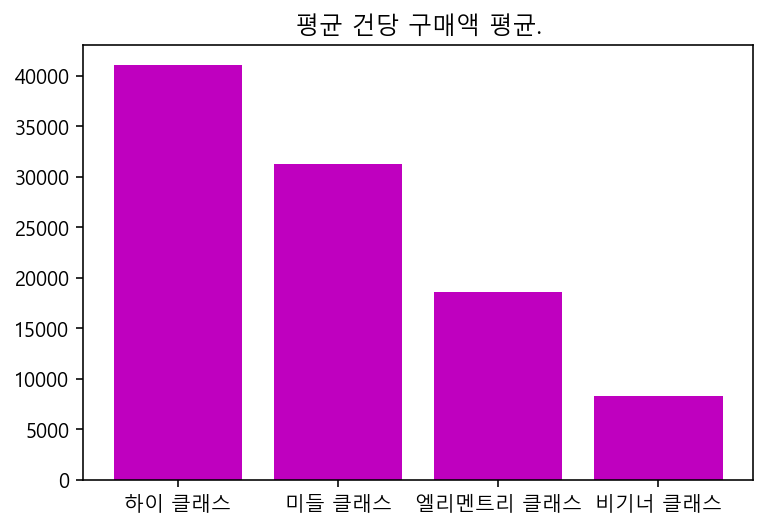

In [608]:
# 등급별 평균 건당 구매액.
plt.title('평균 건당 구매액 평균.')
plt.bar(t['Rank'],t['Avg'], color = 'm')
plt.show()


**4) 추가**

In [539]:

cst['Age'] = sales['Age']
print(cst)

     CustomerID  Seq     Amt       Rank          Avg  Age
0       c017487   90  296447     하이 클래스  3293.855556   49
1       c017503   37  160444     하이 클래스  4336.324324   49
2       c017517  124  317590     하이 클래스  2561.209677   50
3       c017522   61  219849     하이 클래스  3604.081967   50
4       c017526   21   48881     미들 클래스  2327.666667   50
...         ...  ...     ...        ...          ...  ...
2232    c400937    1    1650    비기너 클래스  1650.000000   33
2233    c401555    3   11940  엘리멘트리 클래스  3980.000000   42
2234    c401584    2    6509    비기너 클래스  3254.500000   75
2235    c402010    3   20650  엘리멘트리 클래스  6883.333333   75
2236    c402634    3    4850    비기너 클래스  1616.666667   45

[2237 rows x 6 columns]


In [577]:
# tmp = cst.copy()
# tmp['Age'] = tmp.groupby('Rank',as_index=True)['Age'].agg('mean')
# print(tmp)
tmp2 = cst.copy()
tmp2 = cst.groupby('Rank',as_index=False)[['Age']].mean()
print(tmp2)

        Rank        Age
0    비기너 클래스  46.735714
1  엘리멘트리 클래스  46.716071
2     미들 클래스  47.320789
3     하이 클래스  47.545617


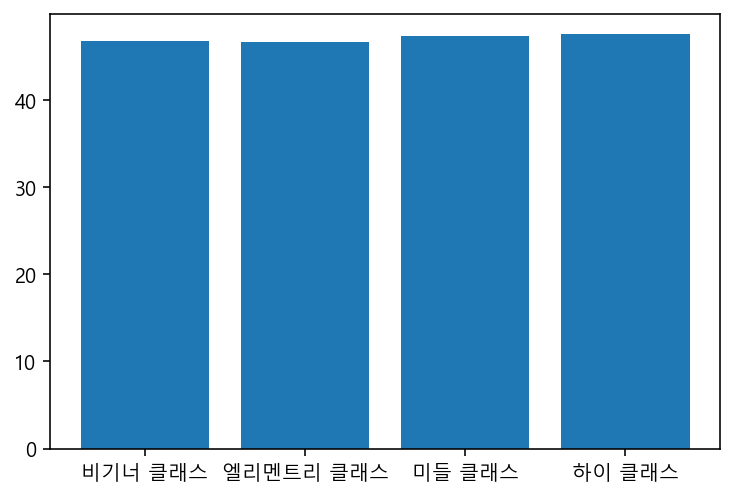

In [576]:
# 각 클래스별 평균 나이 
plt.bar(tmp2['Rank'],tmp2['Age'])
plt.show()
# 거의 똑같다.

**5) 추가**

In [588]:
tmp3 = cst.copy()
tmp3 = cst.groupby('Rank',as_index=False)['Amt'].min()
print(tmp3)

        Rank     Amt
0    비기너 클래스     273
1  엘리멘트리 클래스    8500
2     미들 클래스   30250
3     하이 클래스  103078


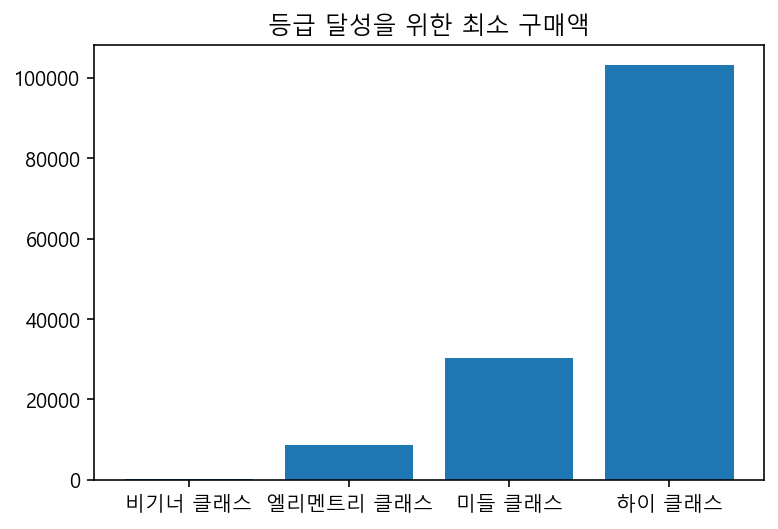

In [591]:
# 등급 달성을 위한 최소 구매액
plt.title('등급 달성을 위한 최소 구매액')
plt.bar(tmp3['Rank'],tmp3['Amt'])
plt.show()

# 엘리멘트리를 위해선 약 8천 / 미들은 3만 / 하이는 10만을 지불해야함.

## 7.정리

- 분석을 통해 확인한 내용을 정리합니다.

**1) 의견**






- 구매자 평균 나이가 4~50대이기에 어린이 장난감, 부모님 선물도 제품에 넣는다면 큰 효과를 볼 수 있다.
- 여성 구매자가 압도적으로 많아 여성 제품 추가도 괜찮음.
- 우유, 사과, 딸기, 두부, 콩나물이 주력 상품이라 제품 리뉴얼 할 때 빼지 말아야 함.
- 구매액으로 보면 하이클래스가 압도적으로 높았는데 등급별 평균 구매액은 계단식 구조라 흥미로움.
- 남성층, 젊은층의 고객이 상대적으로 부족한데 이들에게 흥미를 끌 제품이 필요함.

**2) 기타**

- 여태 사용했던 함수들을 모두 사용하는 시간을 가졌는데 많이 힘들었다.
- 보는 시각에 따라 해석이 다양할 수 있어서 통계는 어렵다고 생각한다.
- 상황에 따라 써야할 함수를 판별하는데 도움이 됐다.
- 파이썬 역량을 늘리는데 좋은 시간이였다.
- 표를 볼때마다 대한민국이 아니라 서울 공화국임을 깨닫고 있다.